# Machine Learning Techniques for Sales Forecasting

## Importing Libraries

In [1464]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Importing Datasets & Read all csv files

files available at: https://www.kaggle.com/datasets/ndarshan2797/english-converted-datasets

01. item_categories.csv - 
    item_category_name, 
    item_category_id

02. items.csv - 
    item_name, 
    item_id, 
    category_id

03. sales_train.csv - 
    date, 
    date_block_num, 
    shop_id, 
    item_id, 
    item_price, 
    item_cnt_day

04. shops.csv - 
    shop_name, 
    shop_id

05. test.csv - 
    ID, 
    shop_id, 
    item_id

In [1465]:
#importing data

item_categories = pd.read_csv('./data-set/item_categories.csv')
items = pd.read_csv('./data-set/items.csv')
sales_train = pd.read_csv('./data-set/sales_train.csv')
shops = pd.read_csv('./data-set/shops.csv')
test = pd.read_csv('./data-set/test.csv')

In [1466]:
#checking the shape of the data
print("Shape of item_categories:", item_categories.shape)
print("Shape of items:", items.shape)
print("Shape of sales_train:", sales_train.shape)
print("Shape of shops:", shops.shape)
print("Shape of test:", test.shape)

Shape of item_categories: (84, 2)
Shape of items: (22170, 3)
Shape of sales_train: (2935849, 6)
Shape of shops: (60, 2)
Shape of test: (214200, 3)


In [1467]:
#checking the columns of the data
print("\n\nColumns of item_categories:\n")
print(item_categories.info())

print("-----------------------------------------------------")

print("\n\nColumns of items:\n")
print(items.info())

print("-----------------------------------------------------")

print("\n\nColumns of sales_train:\n")
print(sales_train.info())

print("-----------------------------------------------------")

print("\n\nColumns of shops:\n")
print(shops.info())

print("-----------------------------------------------------")

print("\n\nColumns of test:\n")
print(test.info())




Columns of item_categories:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
-----------------------------------------------------


Columns of items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_name    22170 non-null  object
 1   item_id      22170 non-null  int64 
 2   category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
-----------------------------------------------------


Columns of sales_train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (

In [1468]:
#checking the head and tail of the data

print("\n\nHead of item_categories:\n")
print(item_categories.head())

print("\n\nTail of item_categories:\n")
print(item_categories.tail())

print("-----------------------------------------------------")

print("\n\nHead of items:\n")
print(items.head())

print("\n\nTail of items:\n")
print(items.tail())

print("-----------------------------------------------------")

print("\n\nHead of sales_train:\n")
print(sales_train.head())

print("\n\nTail of sales_train:\n")
print(sales_train.tail())

print("-----------------------------------------------------")

print("\n\nHead of shops:\n")
print(shops.head())

print("\n\nTail of shops:\n")
print(shops.tail())

print("-----------------------------------------------------")

print("\n\nHead of test:\n")
print(test.head())

print("\n\nTail of test:\n")
print(test.tail())



Head of item_categories:

           item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4


Tail of item_categories:

       item_category_name  item_category_id
79                Service                79
80      Service - Tickets                80
81    Blank media (spire)                81
82   Blank media (piece)                 82
83              Batteries                83
-----------------------------------------------------


Head of items:

                                           item_name  item_id  category_id
0             !! IN THE POWER OF HAPPINESS (PLAST) D        0           40
1  ! ABBYY FineReader 12 Professional Edition Ful...        1           76
2              *** IN THE GLORY OF THE GLORY (UNV) D        2           40
3                   

## Data Preprocessing & Feature Engineering

In [1469]:
#merging the data for better understand the data

In [1470]:
#Merge sales_train.csv with items.csv on the "item_id" column
sales_with_items = sales_train.merge(items, on='item_id', how='left')
print("\n\nHead of sales_with_items:\n")
print(sales_with_items.head(20))
print(sales_with_items.shape)



Head of sales_with_items:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013               0     

In [1471]:
#Merge the result with item_categories.csv on the "category_id" 
sales_with_items_and_categories = sales_with_items.merge(item_categories, right_on='item_category_id', left_on='category_id', how='left')
print("\n\nHead of sales_with_items_and_categories:\n")
print(sales_with_items_and_categories.head(20))
print(sales_with_items_and_categories.shape)



Head of sales_with_items_and_categories:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013      

In [1472]:
# Check if the two columns are the same
if sales_with_items_and_categories['item_category_id'].equals(sales_with_items_and_categories['category_id']):
    # If they are the same, you can drop one of the columns
    sales_with_items_and_categories.drop(columns=['item_category_id'], inplace=True)


In [1473]:
print("\n\nHead of sales_with_items_and_categories:\n")
print(sales_with_items_and_categories.head(20))
print(sales_with_items_and_categories.shape)



Head of sales_with_items_and_categories:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013      

In [1474]:
#Merge the result with shops.csv on the "shop_id" 
final_dataset = sales_with_items_and_categories.merge(shops, on='shop_id', how='left')
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013               0       2

In [1475]:
#checks the columns of the final dataset
print("\n\nColumns of final_dataset:\n")
print(final_dataset.info())



Columns of final_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB
None


In [1476]:
#prints the date and date_block_num column to check whether they are related
columns_to_print = ['date', 'date_block_num']
print(final_dataset[columns_to_print])

               date  date_block_num
0        02.01.2013               0
1        03.01.2013               0
2        05.01.2013               0
3        06.01.2013               0
4        15.01.2013               0
...             ...             ...
2935844  10.10.2015              33
2935845  09.10.2015              33
2935846  14.10.2015              33
2935847  22.10.2015              33
2935848  03.10.2015              33

[2935849 rows x 2 columns]


In [1477]:
# Rename the column
final_dataset.rename(columns={'date_block_num': 'month_num'}, inplace=True)

In [1478]:
#Rename the item_cnt_day column
final_dataset.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [1479]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
2   05.01.2013          0       25     2552      899.00            -1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   

In [1480]:
#checks the columns of the final dataset
print("\n\nColumns of final_dataset:\n")
print(final_dataset.info())



Columns of final_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   month_num           int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_month      float64
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB
None


In [1481]:
#Data Cleaning

#checking for missing values
print("\n\nMissing values in final_dataset:\n")
print(final_dataset.isnull().sum())



Missing values in final_dataset:

date                  0
month_num             0
shop_id               0
item_id               0
item_price            0
item_cnt_month        0
item_name             0
category_id           0
item_category_name    0
shop_name             0
dtype: int64


In [1482]:
#checking for null values
print("\n\nNull values in final_dataset:\n")
print(final_dataset.isnull().sum())



Null values in final_dataset:

date                  0
month_num             0
shop_id               0
item_id               0
item_price            0
item_cnt_month        0
item_name             0
category_id           0
item_category_name    0
shop_name             0
dtype: int64


In [1483]:
print(final_dataset.shape)

(2935849, 10)


In [1484]:
#handles the missing values in final_dataset
final_dataset['item_name'].fillna('Unknown', inplace=True)
final_dataset['item_category_name'].fillna('Unknown', inplace=True)

In [1485]:
print(final_dataset.shape)

(2935849, 10)


In [1486]:
#removes duplicates rows in final_dataset
final_dataset.drop_duplicates(inplace=True)


In [1487]:
print(final_dataset.shape)

(2935843, 10)


In [1488]:
#checks and solves the data type of the columns
print("\n\nData types of final_dataset:\n")
print(final_dataset.dtypes)




Data types of final_dataset:

date                   object
month_num               int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_month        float64
item_name              object
category_id             int64
item_category_name     object
shop_name              object
dtype: object


In [1489]:
# #seems like item_cnt_month should be int64
# final_dataset['item_cnt_month'] = final_dataset['item_cnt_month'].astype('int64')

In [1490]:
print(final_dataset.dtypes)

date                   object
month_num               int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_month        float64
item_name              object
category_id             int64
item_category_name     object
shop_name              object
dtype: object


In [1491]:
#prints item_cnt_month column to check whether it is int64
print(final_dataset['item_cnt_month'].head(30))   

0     1.0
1     1.0
2    -1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     3.0
10    2.0
11    1.0
12    1.0
13    2.0
14    1.0
15    2.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: item_cnt_month, dtype: float64


In [1492]:
print(final_dataset.shape)

(2935843, 10)


In [1493]:
#removes -1 and 307980 from item_cnt_month column
#because it is an outlier
#and it is not possible to sell -1 and 307980 items in a day
#because 307980 is the total number of items sold in a day
#which means that the data is incorrect
#and -1 is not possible
#which means that the data is incorrect

final_dataset = final_dataset[(final_dataset['item_cnt_month'] > 0) & (final_dataset['item_cnt_month'] < 307980)]

print(final_dataset.shape)

(2928487, 10)


In [1494]:
#outlier treatment

#checks for outliers in the item_cnt_month column
print("\n\nOutliers in item_cnt_month column:\n")
print(final_dataset[final_dataset['item_cnt_month'] > 1000])

#removes the outliers in the item_cnt_month column
final_dataset = final_dataset[final_dataset['item_cnt_month'] < 1000]

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Outliers in item_cnt_month column:

               date  month_num  shop_id  item_id  item_price  item_cnt_month  \
2909818  28.10.2015         33       12    11373    0.908714          2169.0   

                                         item_name  category_id  \
2909818  Delivery to the point of issue (Boxberry)            9   

         item_category_name                               shop_name  
2909818   Delivery of goods   Internet-shop of emergency situations  


Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      5

In [1495]:
#deal with the incorrect data in the item_price column
#the item_price should not be negative
#the item_price should not be zero
#the item_price should not be greater than 100000

final_dataset = final_dataset[(final_dataset['item_price'] > 0) & (final_dataset['item_price'] < 100000)]

In [1496]:
print(final_dataset.shape)

(2928483, 10)


In [1497]:
#handles special characters and formatting in the data set
final_dataset['item_name'] = final_dataset['item_name'].str.replace('[^A-Za-z0-9А-Яа-я]+', ' ')

In [1498]:
print(final_dataset.shape)

(2928483, 10)


In [1499]:
#handles noise in the data set

#removes the noise in the item_name column
final_dataset['item_name'] = final_dataset['item_name'].str.replace('  ', ' ')

In [1500]:
print(final_dataset.head())

         date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0  02.01.2013          0       59    22154      999.00             1.0   
1  03.01.2013          0       25     2552      899.00             1.0   
3  06.01.2013          0       25     2554     1709.05             1.0   
4  15.01.2013          0       25     2555     1099.00             1.0   
5  10.01.2013          0       25     2564      349.00             1.0   

                                           item_name  category_id  \
0                                    SCENE 2012 (BD)           37   
1             DEEP PURPLE The House Of Blue Light LP           58   
3             DEEP PURPLE Who Do You Think We Are LP           58   
4      DEEP PURPLE 30 Very Best Of 2CD (Businesses).           56   
5  DEEP PURPLE Perihelion: Live In Concert DVD (C...           59   

                    item_category_name                shop_name  
0                     Cinema - Blu-Ray   Yaroslavl TC" Altair "  
1       

In [1501]:
#data integration

#creates a new column called revenue
final_dataset['revenue'] = final_dataset['item_cnt_month'] * final_dataset['item_price']


In [1502]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   
12  07.01.2013          0       25     2574      399.00             1.0   

In [1503]:
#feature engineering

#creates a new column called revenue_per_item
final_dataset['revenue_per_item'] = final_dataset['revenue'] / final_dataset['item_cnt_month']


print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   
12  07.01.2013          0       25     2574      399.00             1.0   

In [1504]:
#checks whether the revenue_per_item column and revenue column are the same

if final_dataset['revenue_per_item'].equals(final_dataset['revenue']):
    # If they are the same, you can drop one of the columns
    final_dataset.drop(columns=['revenue_per_item'], inplace=True)

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   
12  07.01.2013          0       25     2574      399.00             1.0   

In [1505]:
#data integration and data transformation

#creates a new column called date num
final_dataset['date_num'] = final_dataset['date'].str[:2]

In [1506]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   
12  07.01.2013          0       25     2574      399.00             1.0   

In [1507]:
#data integration

#creates a new column called year num
final_dataset['year_num'] = final_dataset['date'].str[6:]

In [1508]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   
12  07.01.2013          0       25     2574      399.00             1.0   

In [1509]:
print(final_dataset.shape)
print(final_dataset.info())

(2928483, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 2928483 entries, 0 to 2935848
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   month_num           int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_month      float64
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
 10  revenue             float64
 11  revenue_per_item    float64
 12  date_num            object 
 13  year_num            object 
dtypes: float64(4), int64(4), object(6)
memory usage: 335.1+ MB
None


In [1510]:
# rearrange the columns
final_dataset = final_dataset[['date', 'date_num', 'year_num', 'month_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'category_id', 'item_category_name', 'item_price', 'item_cnt_month', 'revenue']]

print(final_dataset.shape)
print(final_dataset.info())

(2928483, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 2928483 entries, 0 to 2935848
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_num            object 
 2   year_num            object 
 3   month_num           int64  
 4   shop_id             int64  
 5   shop_name           object 
 6   item_id             int64  
 7   item_name           object 
 8   category_id         int64  
 9   item_category_name  object 
 10  item_price          float64
 11  item_cnt_month      float64
 12  revenue             float64
dtypes: float64(3), int64(4), object(6)
memory usage: 312.8+ MB
None


In [1511]:
#since we already handled the missing and null values in the data set there is no need for imputation

In [1512]:
#data profiling

#descriptive statistics
print("\n\nDescriptive statistics of final_dataset:\n")
print(final_dataset.describe())



Descriptive statistics of final_dataset:

          month_num       shop_id       item_id   category_id    item_price  \
count  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06   
mean   1.456976e+01  3.300296e+01  1.020028e+04  4.001637e+01  8.893627e+02   
std    9.422952e+00  1.622543e+01  6.324391e+03  1.709809e+01  1.718155e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  7.000000e-02   
25%    7.000000e+00  2.200000e+01  4.477000e+03  2.800000e+01  2.490000e+02   
50%    1.400000e+01  3.100000e+01  9.355000e+03  4.000000e+01  3.990000e+02   
75%    2.300000e+01  4.700000e+01  1.569100e+04  5.500000e+01  9.990000e+02   
max    3.300000e+01  5.900000e+01  2.216900e+04  8.300000e+01  5.920000e+04   

       item_cnt_month       revenue  
count    2.928483e+06  2.928483e+06  
mean     1.247257e+00  1.164267e+03  
std      2.217429e+00  5.684853e+03  
min      1.000000e+00  7.000000e-02  
25%      1.000000e+00  2.490000e+02  
50%      1.00000

In [1513]:
#data enrichment

#creates a new column called month name
final_dataset['month_name'] = final_dataset['month_num'].replace({0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December', 12: 'January', 13: 'February', 14: 'March', 15: 'April', 16: 'May', 17: 'June', 18: 'July', 19: 'August', 20: 'September', 21: 'October', 22: 'November', 23: 'December', 24: 'January', 25: 'February', 26: 'March', 27: 'April', 28: 'May', 29: 'June', 30: 'July', 31: 'August', 32: 'September', 33: 'October'})

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num year_num  month_num  shop_id                shop_name  \
0   02.01.2013       02     2013          0       59   Yaroslavl TC" Altair "   
1   03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
3   06.01.2013       06     2013          0       25     Moscow TEC" Atrium "   
4   15.01.2013       15     2013          0       25     Moscow TEC" Atrium "   
5   10.01.2013       10     2013          0       25     Moscow TEC" Atrium "   
6   02.01.2013       02     2013          0       25     Moscow TEC" Atrium "   
7   04.01.2013       04     2013          0       25     Moscow TEC" Atrium "   
8   11.01.2013       11     2013          0       25     Moscow TEC" Atrium "   
9   03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
10  03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
11  05.01.2013       05     2013          0       25     Moscow TEC" Atrium "   
12

In [1514]:
#removes month_num column

final_dataset.drop(columns=['month_num'], inplace=True)

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num year_num  shop_id                shop_name  item_id  \
0   02.01.2013       02     2013       59   Yaroslavl TC" Altair "    22154   
1   03.01.2013       03     2013       25     Moscow TEC" Atrium "     2552   
3   06.01.2013       06     2013       25     Moscow TEC" Atrium "     2554   
4   15.01.2013       15     2013       25     Moscow TEC" Atrium "     2555   
5   10.01.2013       10     2013       25     Moscow TEC" Atrium "     2564   
6   02.01.2013       02     2013       25     Moscow TEC" Atrium "     2565   
7   04.01.2013       04     2013       25     Moscow TEC" Atrium "     2572   
8   11.01.2013       11     2013       25     Moscow TEC" Atrium "     2572   
9   03.01.2013       03     2013       25     Moscow TEC" Atrium "     2573   
10  03.01.2013       03     2013       25     Moscow TEC" Atrium "     2574   
11  05.01.2013       05     2013       25     Moscow TEC" Atrium "     2574   
12  07.01.2013       07   

In [1515]:
#rearange the columns

final_dataset = final_dataset[['date', 'date_num', 'month_name', 'year_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'category_id', 'item_category_name', 'item_price', 'item_cnt_month', 'revenue']]

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [1516]:
#imputation is already performed under data preprocessing
#outliers are handled already under data preprocessing

In [1517]:
#data binning

#found the bins using the following code
print(final_dataset['item_price'].max())
print(final_dataset['item_price'].min())

#creates a new column called price range
final_dataset['price_range'] = pd.cut(final_dataset['item_price'], bins=[-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 100000], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-100000'])

59200.0
0.07


In [1518]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [1519]:
#log transformation
#this will help to address certain issues in the data set and it'll help to enhance the performance of the model

#creates a new column called log_revenue
final_dataset['log_revenue'] = np.log(final_dataset['revenue'])

In [1520]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [1521]:
#encoding

#encodes the year_num column to 0, 1, 2

final_dataset['year_num'] = final_dataset['year_num'].replace({'2013': 0, '2014': 1, '2015': 2})


print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)




Head of final_dataset:

          date date_num month_name  year_num  shop_id  \
0   02.01.2013       02    January         0       59   
1   03.01.2013       03    January         0       25   
3   06.01.2013       06    January         0       25   
4   15.01.2013       15    January         0       25   
5   10.01.2013       10    January         0       25   
6   02.01.2013       02    January         0       25   
7   04.01.2013       04    January         0       25   
8   11.01.2013       11    January         0       25   
9   03.01.2013       03    January         0       25   
10  03.01.2013       03    January         0       25   
11  05.01.2013       05    January         0       25   
12  07.01.2013       07    January         0       25   
13  08.01.2013       08    January         0       25   
14  10.01.2013       10    January         0       25   
15  11.01.2013       11    January         0       25   
16  13.01.2013       13    January         0       25   
17  1

In [1522]:
#grouping and aggregation

#grouping the data set by shop_id and year_num
#and aggregating the item_cnt_month column using sum

grouped_by_shop_id_and_year_num = final_dataset.groupby(['shop_id', 'year_num']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_shop_id_and_year_num:\n")
print(grouped_by_shop_id_and_year_num.head(60))
print(grouped_by_shop_id_and_year_num.shape)



Head of grouped_by_shop_id_and_year_num:

                  item_cnt_month
shop_id year_num                
0       0                11705.0
1       0                 6311.0
2       0                 9989.0
        1                12247.0
        2                 8470.0
3       0                10242.0
        1                11039.0
        2                 7194.0
4       0                19054.0
        1                15909.0
        2                 9106.0
5       0                14717.0
        1                17041.0
        2                11089.0
6       0                46707.0
        1                35496.0
        2                18554.0
7       0                28218.0
        1                24530.0
        2                14411.0
8       0                 3602.0
9       0                 6531.0
        1                 6155.0
        2                 3188.0
10      0                11132.0
        1                 8859.0
        2                 4532.0

In [1523]:
#feature split is already performed under data preprocessing


In [1524]:
#scaling

#creates a new column called scaled_revenue
final_dataset['scaled_revenue'] = (final_dataset['revenue'] - final_dataset['revenue'].min()) / (final_dataset['revenue'].max() - final_dataset['revenue'].min())

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)





Head of final_dataset:

          date date_num month_name  year_num  shop_id  \
0   02.01.2013       02    January         0       59   
1   03.01.2013       03    January         0       25   
3   06.01.2013       06    January         0       25   
4   15.01.2013       15    January         0       25   
5   10.01.2013       10    January         0       25   
6   02.01.2013       02    January         0       25   
7   04.01.2013       04    January         0       25   
8   11.01.2013       11    January         0       25   
9   03.01.2013       03    January         0       25   
10  03.01.2013       03    January         0       25   
11  05.01.2013       05    January         0       25   
12  07.01.2013       07    January         0       25   
13  08.01.2013       08    January         0       25   
14  10.01.2013       10    January         0       25   
15  11.01.2013       11    January         0       25   
16  13.01.2013       13    January         0       25   
17  1

In [1525]:
#change month_name column to numeric

final_dataset['month_name'] = final_dataset['month_name'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November':11, 'December': 12})

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num  month_name  year_num  shop_id  \
0   02.01.2013       02           1         0       59   
1   03.01.2013       03           1         0       25   
3   06.01.2013       06           1         0       25   
4   15.01.2013       15           1         0       25   
5   10.01.2013       10           1         0       25   
6   02.01.2013       02           1         0       25   
7   04.01.2013       04           1         0       25   
8   11.01.2013       11           1         0       25   
9   03.01.2013       03           1         0       25   
10  03.01.2013       03           1         0       25   
11  05.01.2013       05           1         0       25   
12  07.01.2013       07           1         0       25   
13  08.01.2013       08           1         0       25   
14  10.01.2013       10           1         0       25   
15  11.01.2013       11           1         0       25   
16  13.01.2013       13           1         0 

## Data Exploration & Analysis

In [1526]:

#correlation

numeric_columns = final_dataset.select_dtypes(include=['number'])
print("\n\nCorrelation of final_dataset:\n")
print(numeric_columns.corr())



Correlation of final_dataset:

                month_name  year_num   shop_id   item_id  category_id  \
month_name        1.000000 -0.134131  0.020646 -0.002103    -0.001055   
year_num         -0.134131  1.000000  0.011835  0.010486     0.030406   
shop_id           0.020646  0.011835  1.000000  0.029344     0.019339   
item_id          -0.002103  0.010486  0.029344  1.000000     0.369384   
category_id      -0.001055  0.030406  0.019339  0.369384     1.000000   
item_price        0.044361  0.080574 -0.023966 -0.134759    -0.255033   
item_cnt_month    0.021007  0.002510 -0.005660  0.018896     0.016922   
revenue           0.030326  0.029541 -0.013540 -0.063423    -0.117860   
log_revenue       0.057248  0.096145 -0.039415 -0.310144    -0.342896   
scaled_revenue    0.030326  0.029541 -0.013540 -0.063423    -0.117860   

                item_price  item_cnt_month   revenue  log_revenue  \
month_name        0.044361        0.021007  0.030326     0.057248   
year_num          0.08057

In [1527]:
#missing values treatment

#checks for missing values
print("\n\nMissing values in final_dataset:\n")
print(final_dataset.isnull().sum())

#checks for null values
print("\n\nNull values in final_dataset:\n")
print(final_dataset.isnull().sum())

#since there are no missing values and null values in the data set there is no need for imputation





Missing values in final_dataset:

date                  0
date_num              0
month_name            0
year_num              0
shop_id               0
shop_name             0
item_id               0
item_name             0
category_id           0
item_category_name    0
item_price            0
item_cnt_month        0
revenue               0
price_range           0
log_revenue           0
scaled_revenue        0
dtype: int64


Null values in final_dataset:

date                  0
date_num              0
month_name            0
year_num              0
shop_id               0
shop_name             0
item_id               0
item_name             0
category_id           0
item_category_name    0
item_price            0
item_cnt_month        0
revenue               0
price_range           0
log_revenue           0
scaled_revenue        0
dtype: int64


In [1528]:
#Descriptive analytics

import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("\nDescriptive statistics of final_dataset:")
print(final_dataset.describe())


Descriptive statistics of final_dataset:
         month_name      year_num       shop_id       item_id   category_id  \
count  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06   
mean   6.248408e+00  7.767790e-01  3.300296e+01  1.020028e+04  4.001637e+01   
std    3.535921e+00  7.684598e-01  1.622543e+01  6.324391e+03  1.709809e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  0.000000e+00  2.200000e+01  4.477000e+03  2.800000e+01   
50%    6.000000e+00  1.000000e+00  3.100000e+01  9.355000e+03  4.000000e+01   
75%    9.000000e+00  1.000000e+00  4.700000e+01  1.569100e+04  5.500000e+01   
max    1.200000e+01  2.000000e+00  5.900000e+01  2.216900e+04  8.300000e+01   

         item_price  item_cnt_month       revenue   log_revenue  \
count  2.928483e+06    2.928483e+06  2.928483e+06  2.928483e+06   
mean   8.893627e+02    1.247257e+00  1.164267e+03  6.254676e+00   
std    1.718155e+03    2.217429e+00  5.684853

In [1529]:
#seasonality analysis

#grouping the data set by month_name
#and aggregating the item_cnt_month column using sum

grouped_by_month_name = final_dataset.groupby(['month_name']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_month_name:\n")
print(grouped_by_month_name)
print(grouped_by_month_name.shape)




Head of grouped_by_month_name:

            item_cnt_month
month_name                
1                 359391.0
2                 322775.0
3                 345171.0
4                 282131.0
5                 277519.0
6                 287443.0
7                 271985.0
8                 294692.0
9                 305967.0
10                304453.0
11                248320.0
12                352723.0
(12, 1)


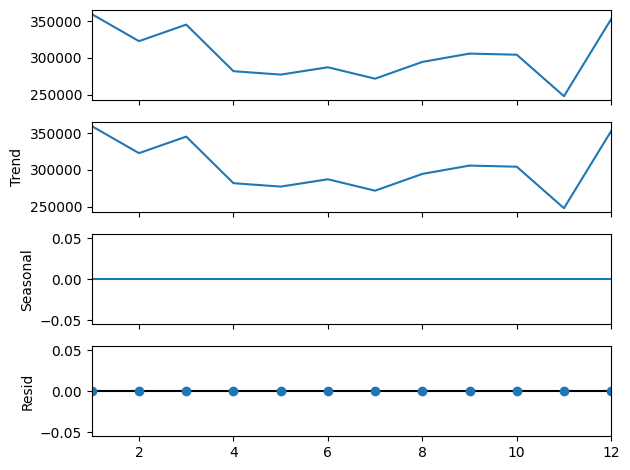

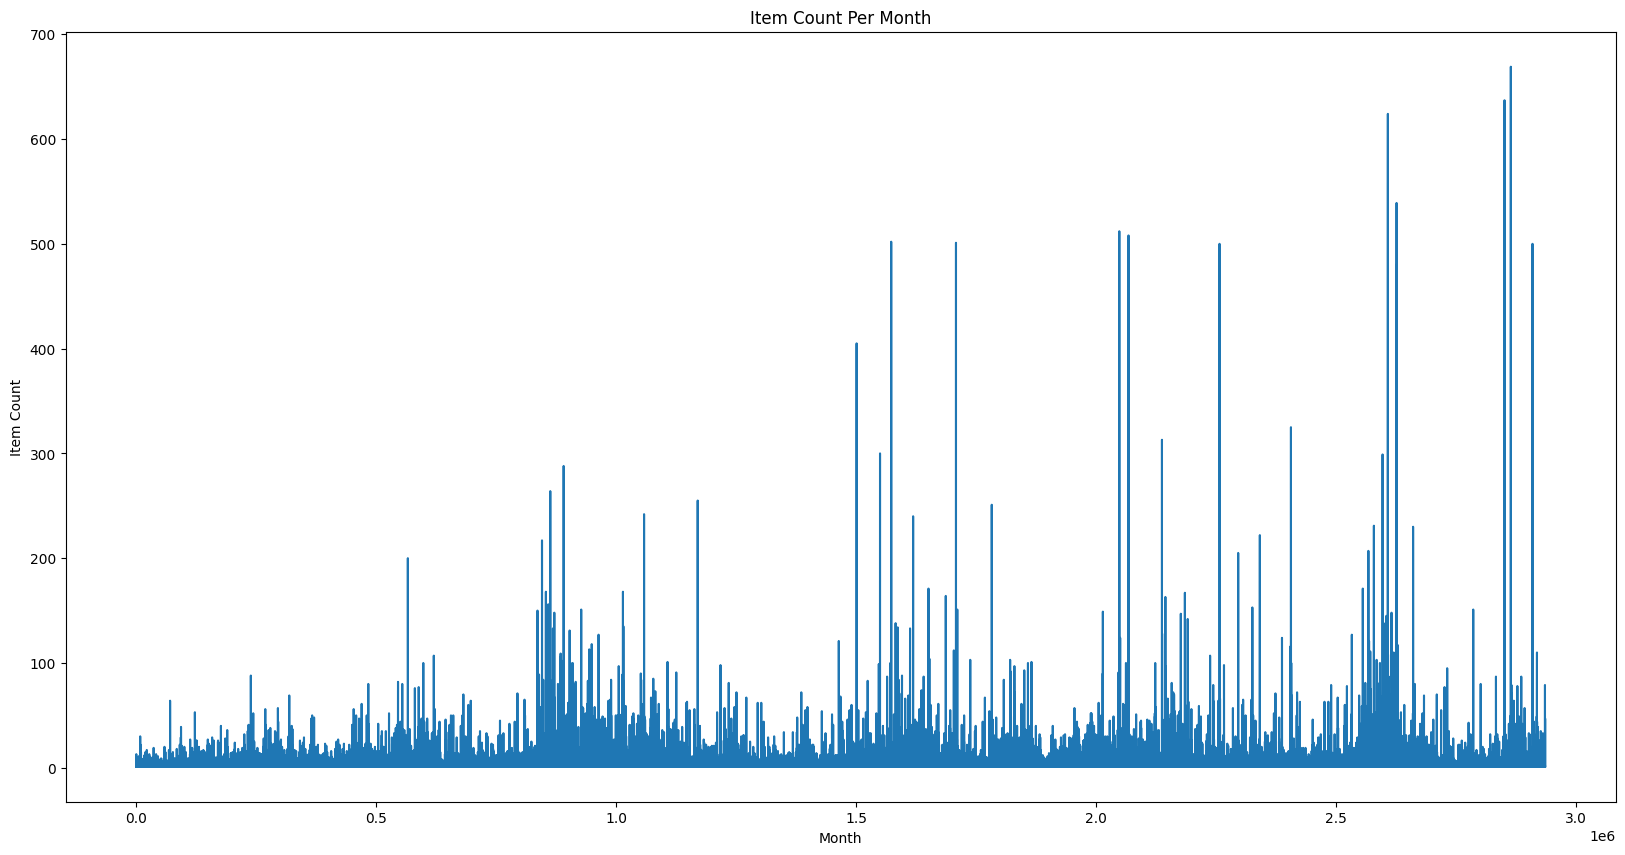

In [1530]:
import statsmodels.api as sm

#performing seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(grouped_by_month_name, model='additive', period=1)


#plotting the seasonal decomposition
fig = decomposition.plot()
plt.show()

#data visualization

#plotting the item_cnt_month column
plt.figure(figsize=(20, 10))
plt.plot(final_dataset['item_cnt_month'])
plt.title('Item Count Per Month')
plt.xlabel('Month')
plt.ylabel('Item Count')
plt.show()



In [1531]:
#regulatory analytics

#grouping the data set by shop_id and year_num
#and aggregating the item_cnt_month column using sum

grouped_by_shop_id_and_year_num = final_dataset.groupby(['shop_id', 'year_num']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_shop_id_and_year_num:\n")
print(grouped_by_shop_id_and_year_num.head(60))



Head of grouped_by_shop_id_and_year_num:

                  item_cnt_month
shop_id year_num                
0       0                11705.0
1       0                 6311.0
2       0                 9989.0
        1                12247.0
        2                 8470.0
3       0                10242.0
        1                11039.0
        2                 7194.0
4       0                19054.0
        1                15909.0
        2                 9106.0
5       0                14717.0
        1                17041.0
        2                11089.0
6       0                46707.0
        1                35496.0
        2                18554.0
7       0                28218.0
        1                24530.0
        2                14411.0
8       0                 3602.0
9       0                 6531.0
        1                 6155.0
        2                 3188.0
10      0                11132.0
        1                 8859.0
        2                 4532.0

In [1532]:
#Variable Identification

# Identify numerical and categorical variables
numerical_vars = final_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = final_dataset.select_dtypes(include=['object', 'category']).columns

# Print the list of numerical and categorical variables
print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
Index(['month_name', 'year_num', 'shop_id', 'item_id', 'category_id',
       'item_price', 'item_cnt_month', 'revenue', 'log_revenue',
       'scaled_revenue'],
      dtype='object')

Categorical Variables:
Index(['date', 'date_num', 'shop_name', 'item_name', 'item_category_name',
       'price_range'],
      dtype='object')


In [1533]:
#univariate analysis

# for column in final_dataset.columns:
#     # Check the data type of the variable
#     variable_type = final_dataset[column].dtype
    
#     # Summary Statistics
#     summary_stats = final_dataset[column].describe()
    
#     # Visualization
#     plt.figure(figsize=(10, 6))
    
#     # For numerical variables, create a histogram
#     if variable_type in ['int64', 'float64']:
#         sns.histplot(data=final_dataset, x=column, kde=True)
#         plt.title(f'Distribution of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
    
#     # For categorical variables, create a bar plot
#     else:
#         sns.countplot(data=final_dataset, x=column)
#         plt.title(f'Counts of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
    
#     plt.show()
    
#     # Print summary statistics
#     print(f"Summary Statistics for {column}:")
#     print(summary_stats)

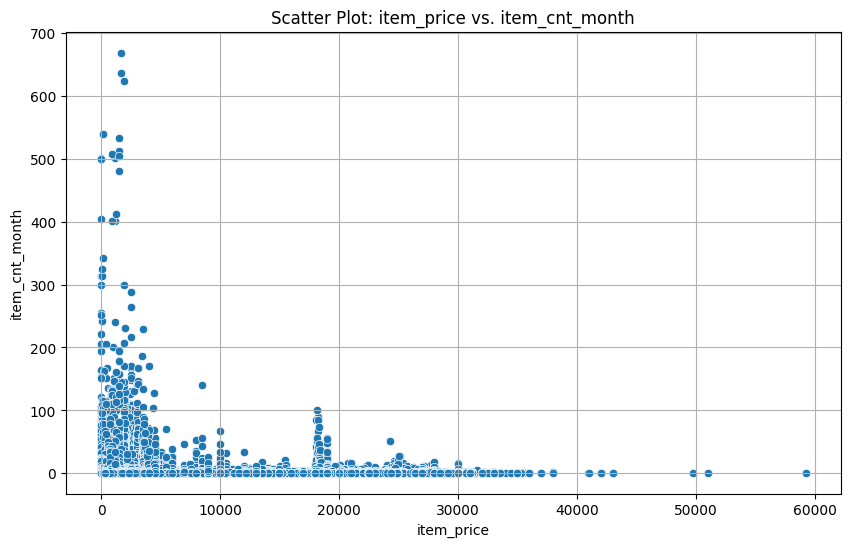

Correlation between item_price and item_cnt_month: 0.01


In [1534]:
#bivariate analysis

var1 = 'item_price'
var2 = 'item_cnt_month'

# Check the data types of the chosen variables
var1_type = final_dataset[var1].dtype
var2_type = final_dataset[var2].dtype

# Scatter Plot for Numerical vs. Numerical
if var1_type in ['int64', 'float64'] and var2_type in ['int64', 'float64']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=final_dataset, x=var1, y=var2)
    plt.title(f'Scatter Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

# Box Plot for Categorical vs. Numerical
elif var1_type in ['object', 'category'] and var2_type in ['int64', 'float64']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=final_dataset, x=var1, y=var2)
    plt.title(f'Box Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

# Bar Plot for Categorical vs. Categorical (if applicable)
elif var1_type in ['object', 'category'] and var2_type in ['object', 'category']:
    crosstab = pd.crosstab(final_dataset[var1], final_dataset[var2])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Bar Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Print correlation for Numerical vs. Numerical
if var1_type in ['int64', 'float64'] and var2_type in ['int64', 'float64']:
    correlation = final_dataset[[var1, var2]].corr().iloc[0, 1]
    print(f'Correlation between {var1} and {var2}: {correlation:.2f}')


In [1535]:
#Exploratory Data Analysis (EDA)

df = final_dataset.copy()

# # Display basic information about the dataset
# print("Dataset Overview:")
# print(df.info())

# # Summary statistics for numerical variables
# print("\nSummary Statistics for Numerical Variables:")
# print(df.describe())

# # Check for missing values
# print("\nMissing Values:")
# print(df.isnull().sum())

# # Visualize data distribution using histograms for numerical variables
# numerical_columns = ['month_name', 'year_num', 'shop_id', 'item_id', 'category_id', 'item_price', 'item_cnt_month', 'revenue', 'log_revenue', 'scaled_revenue']

# for column in numerical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=df, x=column, kde=True, bins=20)
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# # Visualize relationships between variables with a correlation matrix for numerical variables
# correlation_matrix = df[numerical_columns].corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap for Numerical Variables")
# plt.show()

# # Explore categorical variables with bar plots
# categorical_columns = ['shop_name', 'item_name', 'item_category_name', 'price_range']

# for column in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df, x=column)
#     plt.title(f'Counts of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()



In [1536]:
#inferential analysis

import scipy.stats as stats

# Generate a hypothetical dataset (replace this with your own data)
np.random.seed(42)
data = np.random.normal(loc=70, scale=10, size=100)

# Create a DataFrame from the generated data
df = pd.DataFrame({'measurement': data})

# Calculate the sample mean and standard deviation
sample_mean = df['measurement'].mean()
sample_std = df['measurement'].std()

# Define a hypothetical population mean for comparison
population_mean = 75 

# Perform a t-test to compare the sample mean with the population mean
t_statistic, p_value = stats.ttest_1samp(df['measurement'], population_mean)

# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Population Mean: {population_mean}")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Determine statistical significance
alpha = 0.05  # Significance level (adjust as needed)
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is statistically different from the population mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and the population mean.")



Sample Mean: 68.96
Sample Standard Deviation: 9.08
Population Mean: 75
T-Statistic: -6.65
P-Value: 0.0000
Reject the null hypothesis: The sample mean is statistically different from the population mean.


In [1537]:
#dianostic analytics

# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a hypothetical dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + 2 + np.random.randn(100, 1)

# Create a DataFrame from the generated data
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Diagnostic Plots
plt.figure(figsize=(12, 6))

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

item_category_name
 Cinema - DVD                      563937
 PC Games - Standard Editions      350787
 Music - CD of local production    339127
 Games - PS3                       207371
 Cinema - Blu-Ray                  191931
                                    ...  
 Books - Guides                         3
 Accessories - PS2                      2
 Books - Postcards                      2
 Books - Cognitive literature           1
 Game consoles - PS2                    1
Name: count, Length: 84, dtype: int64
item_category_name                                   Accessories - PS2  \
shop_name                                                                
 Adygea TC "Mega"                                                    0   
 Balashikha TC "Oktyabr-Kinomir"                                     0   
 Chekhov TC" Karnaval "                                              0   
 Digital warehouse 1C-Online                                         0   
 Internet-shop of emergency situation

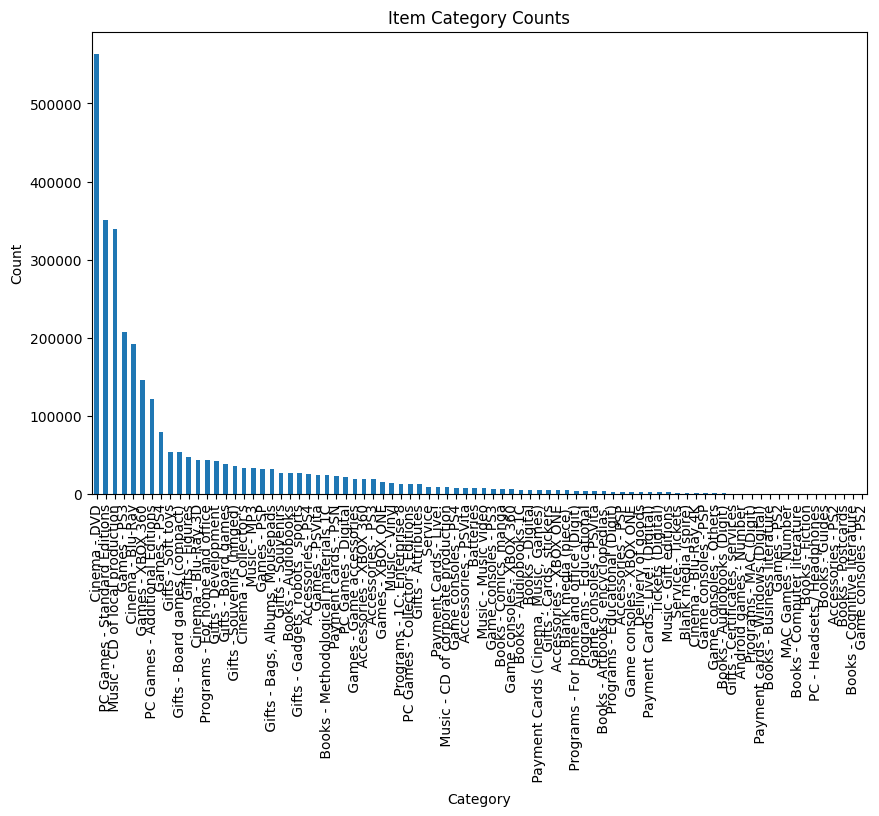

In [1538]:
#qualitative analytics

# 1. Count the unique values in a categorical column (e.g., item_category_name)
category_counts = final_dataset['item_category_name'].value_counts()
print(category_counts)

# 2. Cross-tabulation to examine relationships between two categorical columns (e.g., shop_name and item_category_name)
cross_tab = pd.crosstab(final_dataset['shop_name'], final_dataset['item_category_name'])
print(cross_tab)

# 3. Calculate the frequency of a particular category within a column
category_frequency = (final_dataset['price_range'] == 'Low').sum()
print(f"Frequency of 'Low' price range: {category_frequency}")

# 4. Grouping and aggregation (e.g., average item price per category)
average_price_per_category = final_dataset.groupby('item_category_name')['item_price'].mean()
print(average_price_per_category)

# 5. Visualizing categorical data (e.g., a bar chart of category counts)
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Item Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [1539]:
#stationarity analysis

%pip install pandas numpy statsmodels


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


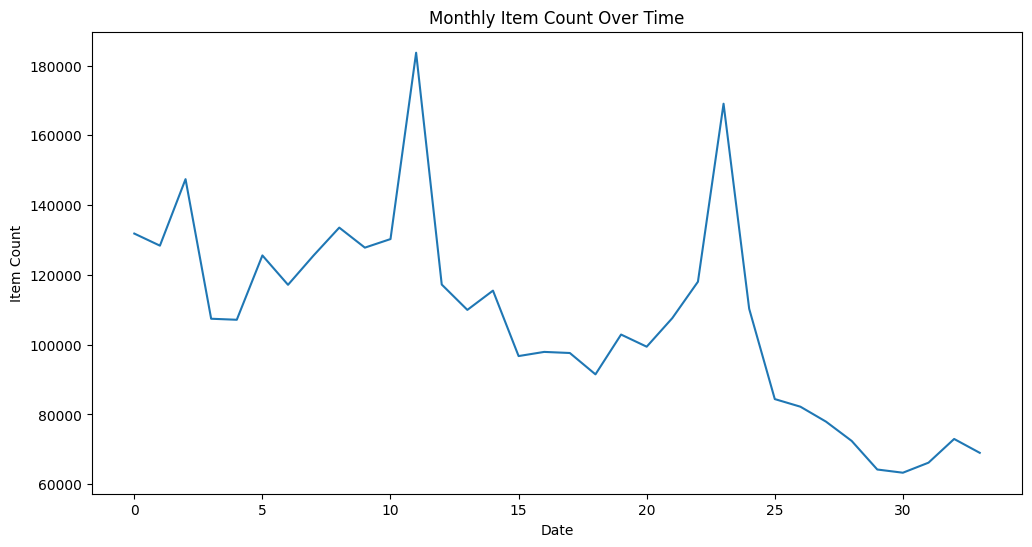

ADF Statistic: -2.372251519825604
p-value: 0.1497218397733845
Critical Values:
   1%: -3.6461350877925254
   5%: -2.954126991123355
   10%: -2.6159676124885216
Non-Stationary (Fail to reject the null hypothesis)


In [1540]:
from statsmodels.tsa.stattools import adfuller

# Convert the date column to datetime format
final_dataset['date'] = pd.to_datetime(final_dataset['date'], format='%d.%m.%Y')

# Group by month and aggregate data
monthly_data = final_dataset.groupby(final_dataset['date'].dt.to_period('M')).agg({
    'item_cnt_month': 'sum',
    # Add other columns to aggregate as needed
}).reset_index()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] <= 0.05:
        print("Stationary (Reject the null hypothesis)")
    else:
        print("Non-Stationary (Fail to reject the null hypothesis)")

# Example: Check stationarity for 'item_cnt_month'
item_cnt_month_series = monthly_data['item_cnt_month']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(item_cnt_month_series)
plt.title('Monthly Item Count Over Time')
plt.xlabel('Date')
plt.ylabel('Item Count')
plt.show()

# Perform ADF test for stationarity
adf_test(item_cnt_month_series)



In [1541]:
# #autocorrelation analysis

# import pandas as pd

# # Set the 'date' column as the DataFrame's index
# final_dataset.set_index('date', inplace=True)

# # Sort the DataFrame by date if it's not already sorted
# final_dataset.sort_index(inplace=True)

# # Calculate the autocorrelation for the 'item_cnt_month' column
# autocorrelation = final_dataset['item_cnt_month'].autocorr()

# # Plot the autocorrelation function (ACF)
# plt.figure(figsize=(12, 6))
# pd.plotting.autocorrelation_plot(final_dataset['item_cnt_month'])
# plt.title(f'Autocorrelation for item_cnt_month (lag = 1), Autocorrelation = {autocorrelation:.2f}')
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.grid(True)
# plt.show()


In [1542]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

         date date_num  month_name  year_num  shop_id  \
0  2013-01-02       02           1         0       59   
1  2013-01-03       03           1         0       25   
3  2013-01-06       06           1         0       25   
4  2013-01-15       15           1         0       25   
5  2013-01-10       10           1         0       25   
6  2013-01-02       02           1         0       25   
7  2013-01-04       04           1         0       25   
8  2013-01-11       11           1         0       25   
9  2013-01-03       03           1         0       25   
10 2013-01-03       03           1         0       25   
11 2013-01-05       05           1         0       25   
12 2013-01-07       07           1         0       25   
13 2013-01-08       08           1         0       25   
14 2013-01-10       10           1         0       25   
15 2013-01-11       11           1         0       25   
16 2013-01-13       13           1         0       25   
17 20

## Model Building

In [1543]:
#prepare the data for modeling
df = pd.read_csv('./data-set/sales_train.csv')
#rename item_cnt_day column
df.rename(columns={'item_cnt_day': 'item_count'}, inplace=True)
#removes duplicates
df.drop_duplicates(inplace=True)
#outlier treatment
df = df[(df['item_count'] > 0) & (df['item_count'] < 307980)]
df = df[df['item_count'] < 1000]
#handles incorrect data
df = df[(df['item_price'] > 0) & (df['item_price'] < 100000)]
#converts date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
#convert date to year-month format
df['year-month'] = df['date'].dt.strftime('%Y-%m')
#drop date column and item_price column
df.drop(columns=['date', 'item_price'], inplace=True)
# group features
df_train_group = df.groupby(['year-month', 'shop_id', 'item_id']).sum().reset_index()
# pivot table
df = df_train_group.pivot_table(index=['shop_id', 'item_id'], columns='year-month', values='item_count', fill_value=0).reset_index()

print(df.head(10))
print(df.shape)
print(df.info())

year-month  shop_id  item_id  2013-01  2013-02  2013-03  2013-04  2013-05  \
0                 0       30        0       31        0        0        0   
1                 0       31        0       11        0        0        0   
2                 0       32        6       10        0        0        0   
3                 0       33        3        3        0        0        0   
4                 0       35        1       14        0        0        0   
5                 0       36        0        1        0        0        0   
6                 0       40        0        1        0        0        0   
7                 0       42        0        1        0        0        0   
8                 0       43        1        0        0        0        0   
9                 0       49        0        2        0        0        0   

year-month  2013-06  2013-07  2013-08  ...  2015-01  2015-02  2015-03  \
0                 0        0        0  ...        0        0        0   
1     

In [1544]:
# Create X and y variables for train and test sets
X = df[df.columns[:-1]]
y = df[df.columns[-1]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(339277, 35)
(84820, 35)
(339277,)
(84820,)


In [1545]:
#creating evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

scores_and_names = []

# Create a function to evaluate the model
def evaluate_the_model(y_true, y_pred, model_name, model):

    # Calculate the MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MAE for {model_name}: {mae:.5f}")

    # Calculate the MSE
    mse = mean_squared_error(y_true, y_pred)
    print(f"MSE for {model_name}: {mse:.5f}")

  

    # Calculate the RMSE
    rmse = np.sqrt(mse)
    print(f"RMSE for {model_name}: {rmse:.5f}")


    #calculate the score
    score = model.score(X_test, y_test)
    print(f"Score for {model_name}: {score:.5f}")

    # Plot the predictions vs. the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(f'Predictions vs. Actual Values ({model_name})')
    plt.xlabel('Observation')
    plt.ylabel('Item Count')
    plt.legend()
    plt.show()

    scores_and_names.append((model_name, score))

    

### linear regression

MAE for Linear Regression: 0.29022
MSE for Linear Regression: 2.39626
RMSE for Linear Regression: 1.54798
Score for Linear Regression: 0.07438


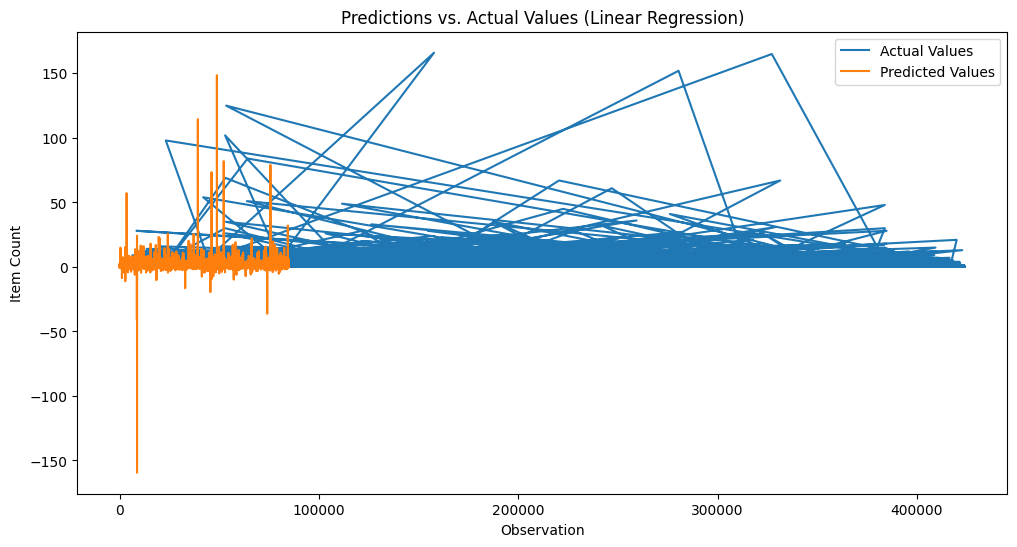

In [1546]:


# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Linear Regression', lin_reg)

### Logistic Regression

C:\Users\srume\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MAE for Logistic Regression: 0.16065
MSE for Logistic Regression: 2.61462
RMSE for Logistic Regression: 1.61698
Score for Logistic Regression: 0.92657


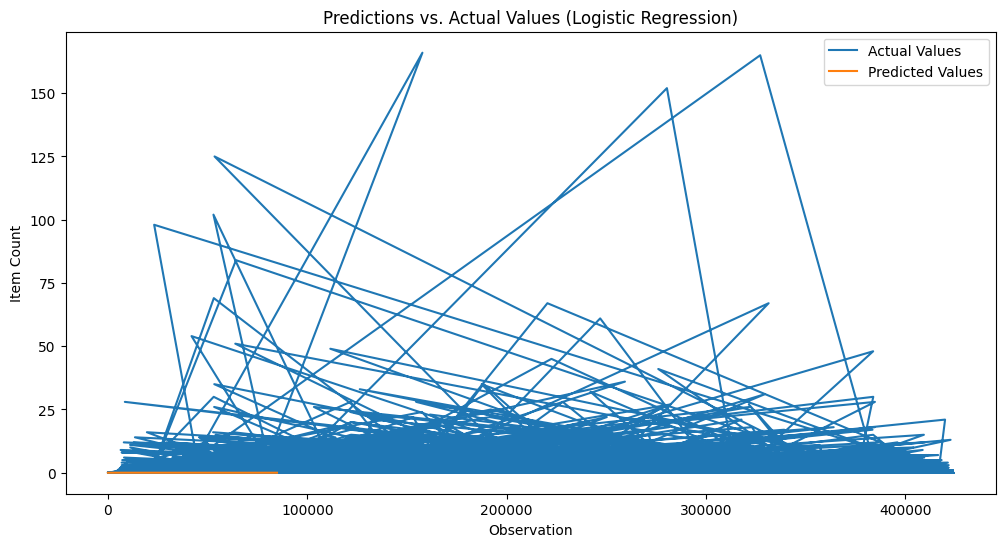

In [1547]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Logistic Regression', log_reg)

### SVM

MAE for Support Vector Machine: 0.16065
MSE for Support Vector Machine: 2.61462
RMSE for Support Vector Machine: 1.61698
Score for Support Vector Machine: 0.92657


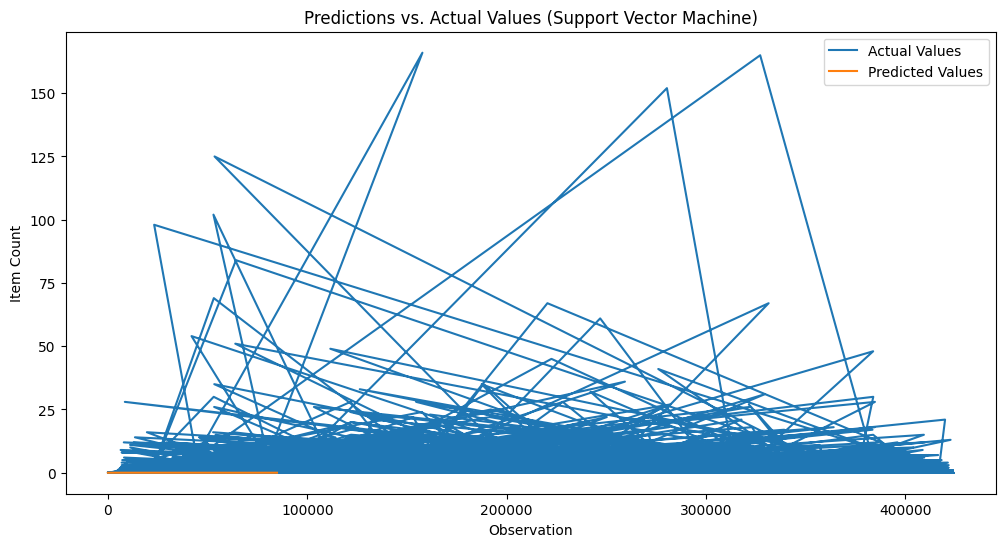

In [1548]:
# create a support vector machine model
from sklearn.svm import SVC
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Support Vector Machine', svm)

### KNN

### Decision Tree

In [ ]:
# create a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Decision Tree', dt)

### random forest

In [ ]:
# create a random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Random Forest', rf)

### Stochastic Gradient Descent

In [ ]:
#create a stochastic gradient descent model
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

# Fit the model to the training data
sgd_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = sgd_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Stochastic Gradient Descent', sgd_reg)

### xtra tree

In [ ]:
#create a extra trees model
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()

# Fit the model to the training data
et.fit(X_train, y_train)

# Make predictions on the test data
y_pred = et.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Extra Trees', et)

### XGBoost

In [ ]:
#install xgboost
%pip install xgboost

#create a xgboost model
from xgboost import XGBRegressor
xgb = XGBRegressor()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

evaluate_the_model(y_test, y_pred, 'XGBoost', xgb)

### ridge regression

In [ ]:
#create ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Ridge Regression', ridge)

### lasso regression

In [ ]:
#create lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Lasso Regression', lasso)

### ARIMA

In [ ]:
#install ARIMA
%pip install statsmodels

#create ARIMA model
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(y_train, order=(1, 1, 1))

# Fit the model to the training data
arima.fit(X_train, y_train)

# Make predictions on the test data
y_pred = arima.predict(X_test)

evaluate_the_model(y_test, y_pred, 'ARIMA', arima)

### ADABOOST

In [ ]:
#create adaboost model
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

# Fit the model to the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada.predict(X_test)

evaluate_the_model(y_test, y_pred, 'AdaBoost', ada)

### BayesianRidge

In [ ]:
# create bayesian ridge model
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

# Fit the model to the training data
br.fit(X_train, y_train)

# Make predictions on the test data
y_pred = br.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Bayesian Ridge', br)

In [ ]:
# create a knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

evaluate_the_model(y_test, y_pred, 'K-Nearest Neighbors', knn)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Compare Models

In [ ]:
#compare the models
results = pd.DataFrame(scores_and_names, columns=['Model', 'Score'])

## Data Visualization

In [ ]:
# # Data Visualization
# # Histograms for numerical columns
# numerical_cols = final_dataset.select_dtypes(include=['number']).columns
# for col in numerical_cols:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=final_dataset, x=col, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

#     # Box plots for numerical columns
# for col in numerical_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(data=final_dataset, y=col)
#     plt.title(f'Box plot of {col}')
#     plt.show()

# # Correlation Heatmap
# correlation_matrix = numerical_cols.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()